<a href="https://colab.research.google.com/github/bridgethom-99/Compiler-Construction/blob/main/Compiler_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group Members**

120790 Nicole Nyakundi

111724 Grace Lihasi Andesia

121060 Bridget Thomas Nyatichi

121521 Stephanie Achieng Otieno

121599 Susan Sagwa Ayago

# **LAB 1**

# **Flex**

**Definition**

*What is Flex?*

Flex is an acronym that stands for "fast lexical analyzer generator. " It is a free alternative to Lex, the standard lexical analyzer generator in Unix-based systems. Flex was originally written in the C programming language by Vern Paxson in 1987.("What is Flex? - Definition from WhatIs.com", 2022). It is a tool used to generate lexical analyzers.

**Diagram**


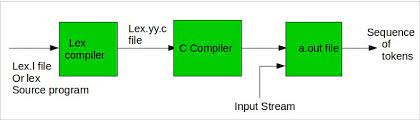

**Code** **Snippet**

The structure of the flex program is as follows:

Definition Section

%%

Rules Section

%%

User Code

**Definition Section**

In this section, flex tool converts the lex specifications to a lexical analyzer. This section contains global declarations and header files. 

**Rules Section**

This section contains the pattern and corresponding action. The pattern part contains a regular expression of the lexical analyzer and the action part is a code, which will be executed when a pattern matches with the input.

**User Defined Section**

This section contains any valid code. 



```
%{
	/*To find whether given letter is a vowel or not*/
#undef yywrap
#define yywrap() 1
	void display(int);
%}

%%

[a|e|i|o|u|] {
		int flag=1;
		display(flag);
		return;
		}

.+ {
	int flag=0;
	display(flag);
	return;
	}
	
%%

void display(int flag)
{
	if(flag==1)
		printf("The given letter [%s] is a vowel",yytext);
	else
		printf("The given letter [%s] is NOT a vowel",yytext);		
}

main()
{
	printf("Enter a letter to check if it is a vowel or not: ");
	yylex(); 
}
```



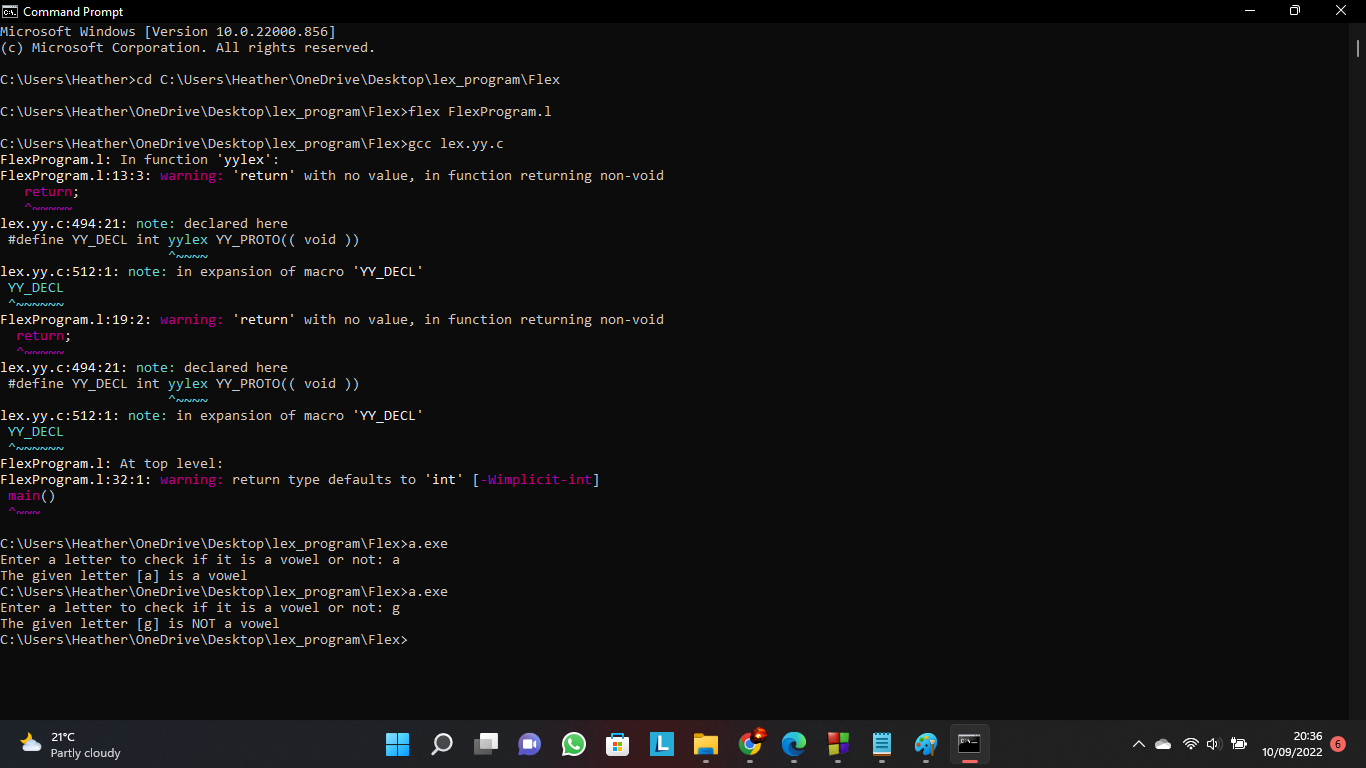

# **Bison**

**Definition**

Bison is a general-purpose parser generator that converts an annotated context-free grammar into a deterministic LR or generalized LR (GLR) parser employing LALR (1) parser tables.The Bison parser is a bottom-up parser. It tries, by shifts and reductions, to reduce the entire input down to a single grouping whose symbol is the grammar's start-symbol.

**Diagram**

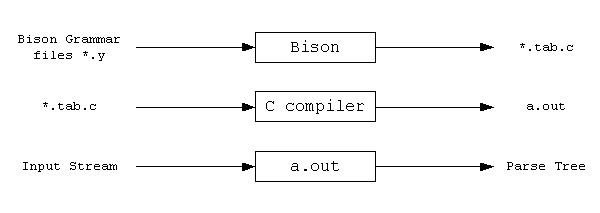

**Code** **Snippet**

Bison is a program that parses a text stream and generates a parse tree. The input file for the Bison utility is a Bison grammar file. The general form of a Bison grammar file is as follows:

%{

Prologue

%}

Bison declarations

%%

Grammar rules

%%

Epilogue


Bison.l
```
%{

#include <stdio.h>
#include <string.h>
#include "bison.tab.h"
void showError();
%}


numbers     ([0-9])+
alpha       ([a-zA-Z])+

%%

{alpha}			   {sscanf(yytext, "%s", yylval.name); return (STRING);}
{numbers}      {yylval.number = atoi(yytext); return (NUM);}
";"      		   {return (SEMICOLON);}
.      		     {showError(); return(OTHER);}

%%


void showError(){
    printf("Other input");
}
int yywrap(){
    return 1;
}
```




Bison.y
```

%{
#include <stdio.h>

int yylex();
int yyerror(char *s);

%}

%token STRING NUM OTHER SEMICOLON

%type <name> STRING
%type <number> NUM

%union{
	  char name[20];
    int number;
}

%%

prog:
  stmts
;

stmts:
		| stmt SEMICOLON stmts

stmt:
		STRING {
				printf("Your entered a string - %s", $1);
		}
		| NUM {
				printf("The number you entered is - %d", $1);
		}
		| OTHER
;

%%

int yyerror(char *s)
{
	printf("Syntax Error on line %s\n", s);
	return 0;
}

int main()
{
    yyparse();
    return 0;
}
```



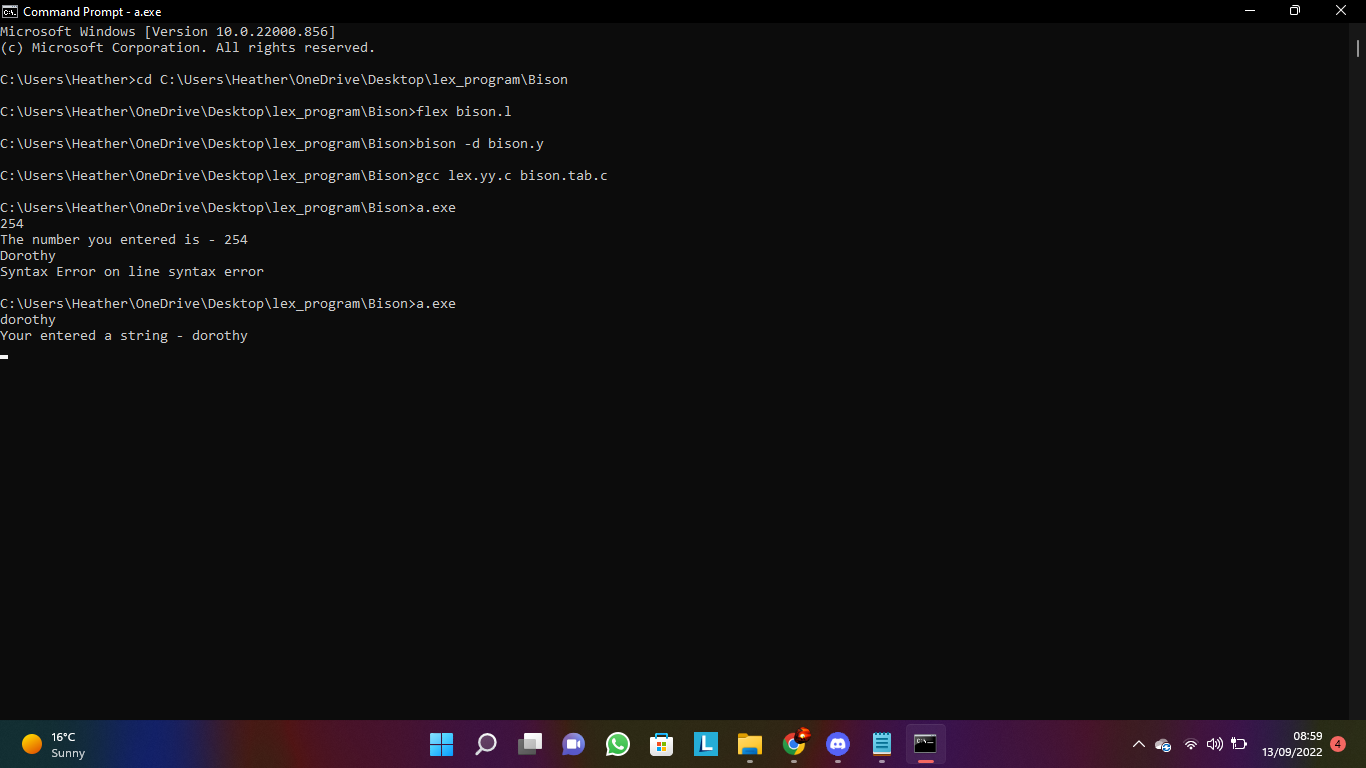

# **Lex**

**Definition**

Lex is a program that generates lexical analyzer. The lexical analyzer is a program that transforms an input stream into a sequence of tokens. It reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program.

The function of Lex is as follows:
*   Firstly lexical analyzer creates a program lex.1 in the Lex language. Then Lex compiler runs the lex.1 program and produces a C program lex.yy.c.
* Finally C compiler runs the lex.yy.c program and produces an object program a.out. 
*   a.out is lexical analyzer that transforms an input stream into a sequence of tokens.

**Diagram**

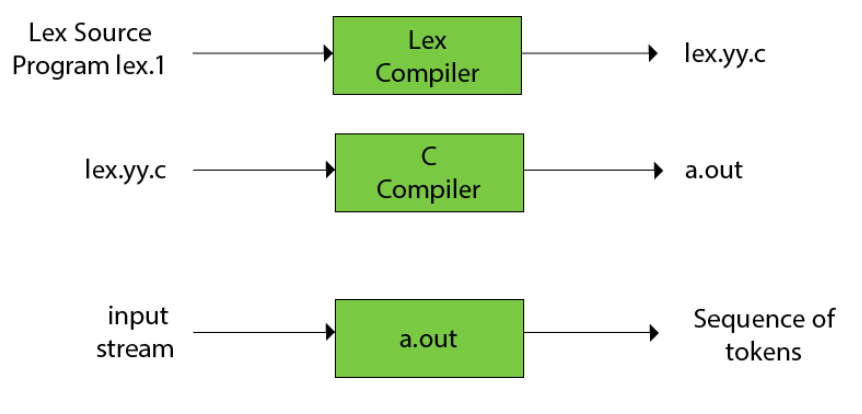

**Code** **Snippet**

The structure of the lex program is as follows:

Definition section

%%

Rules section

%%

User Subroutine section  

The Definition section is the place to define macros and import header files written in the chosen language. It is also possible to write any code here, which will be copied verbatim into the generated source file. It is bracketed with %{ and %}.

The Rules section is the most important section; Each rule is made up of two parts: a pattern and an action separated by whitespace. The lexer that generates text will execute actions associated with each rule when it recognizes input matching its patterns. It is bracketed with %% & %%.

The User Subroutine section contains all procedures required for execution of code by rules in other sections of the program. This is where all C statements and functions are defined that are copied verbatim into generated source file copy them without modification.




```
/*lex program to count number of words*/
%{
#include<stdio.h>
#include<string.h>
int i = 0;
%}
  
/* Rules Section*/
%%
([a-zA-Z0-9])*    {i++;} /* Rule for counting 
                          number of words*/
  
"\n" {printf("%d\n", i); i = 0;}
%%
  
int yywrap(void){}
  
int main()
{   
    // The function that starts the analysis
    yylex();
  
    return 0;
}
```



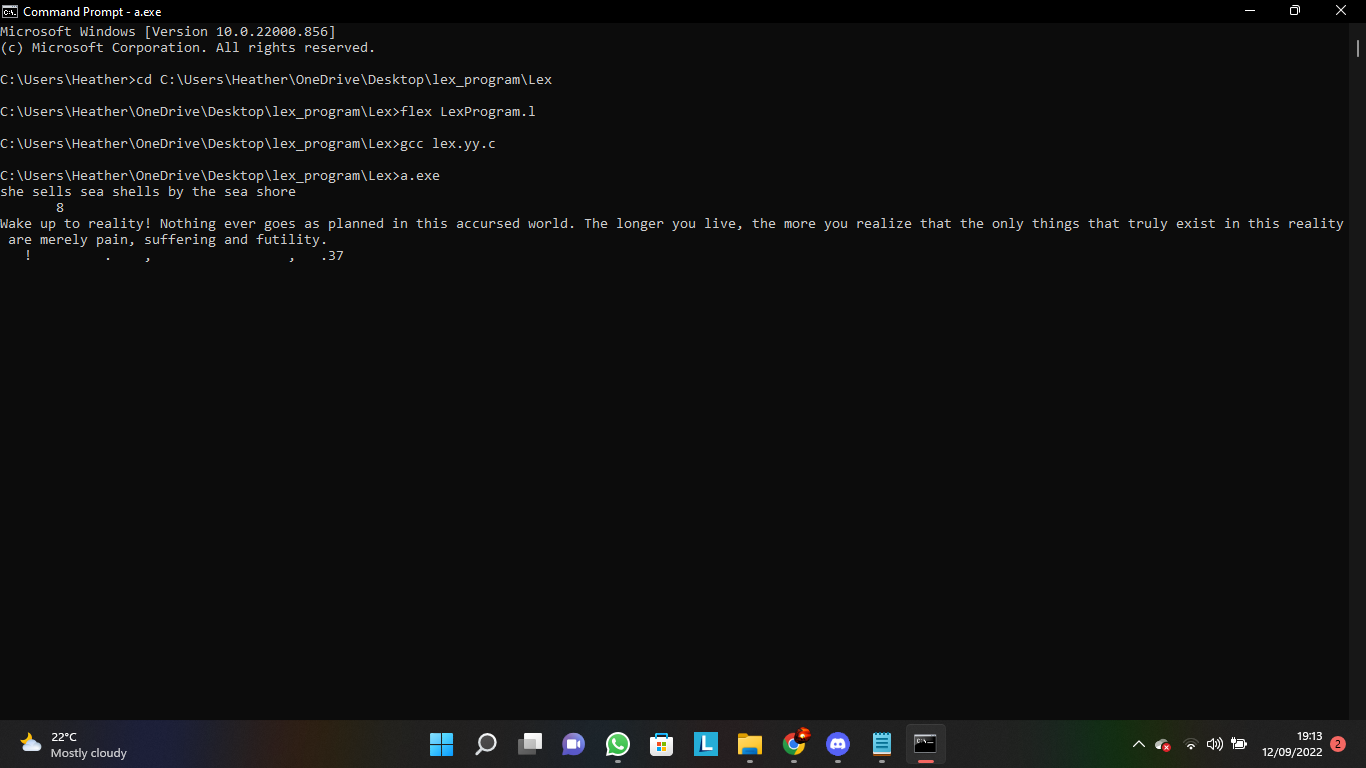

# **Yacc**

**Definition**

*What is Yacc?*



Yacc (for “yet another compiler compiler.”) is the standard parser generator for the Unix operating system. An open source program, yacc generates code for the parser in the C programming language. The input to yacc describes the rules of a grammar. Yacc uses these rules to produce the source code for a program that parses the grammar. You can then compile this source code to obtain a program that reads input, parses it according to the grammar, and takes action based on the result. (IBM- "How Yacc Works", 2021)


**Diagram**

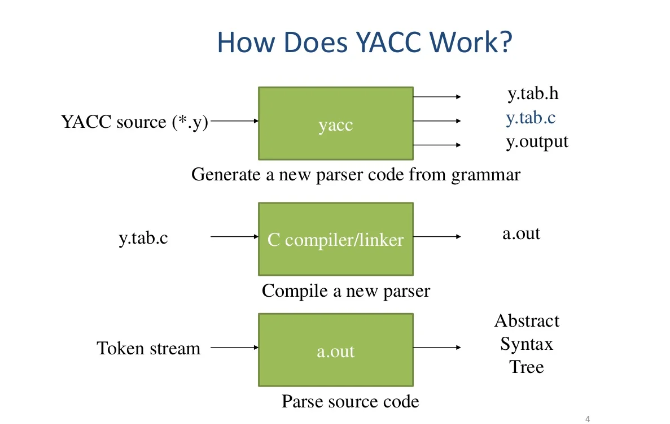

**Code** **Snippet**

A YACC source program is structurally similar to a LEX one.

declarations

%%

rules

%%

routines

The declarations section of Yacc contains the following items:

-Declarations of tokens. Yacc requires token names to be declared as such using the keyword %token.

-Declaration of the start symbol using the keyword %start

-declarations: included files, global variables, types.

-code between %{ and %}.

-RULES SECTION.

A rule has the form:

nonterminal : sentential form      
            | sentential form       
            ; 
            
Actions may be associated with rules and are executed when the associated sentential form is matched.


Yacc.l
```
%{
#include "Yacc.tab.h"
void yyerror (char *s);
int yylex();
%}
%%
"print"				   {return print;}
"exit"				   {return exit_command;}
[a-zA-Z]			   {yylval.id = yytext[0]; return identifier;}
[0-9]+                 {yylval.num = atoi(yytext); return number;}
[ \t\n]                ;
[-+=;]           	   {return yytext[0];}
.                      {ECHO; yyerror ("unexpected character");}

%%
int yywrap (void) {return 1;}
```



Yacc.y

```
%{
void yyerror (char *s);
int yylex();
#include <stdio.h>     /* C declarations used in actions */
#include <stdlib.h>
#include <ctype.h>
int symbols[52];
int symbolVal(char symbol);
void updateSymbolVal(char symbol, int val);
%}

%union {int num; char id;}         /* Yacc definitions */
%start line
%token print
%token exit_command
%token <num> number
%token <id> identifier
%type <num> line exp term 
%type <id> assignment

%%

/* descriptions of expected inputs     corresponding actions (in C) */

line    : assignment ';'		{;}
		| exit_command ';'		{exit(EXIT_SUCCESS);}
		| print exp ';'			{printf("Printing %d\n", $2);}
		| line assignment ';'	{;}
		| line print exp ';'	{printf("Printing %d\n", $3);}
		| line exit_command ';'	{exit(EXIT_SUCCESS);}
        ;

assignment : identifier '=' exp  { updateSymbolVal($1,$3); }
			;
exp    	: term                  {$$ = $1;}
       	| exp '+' term          {$$ = $1 + $3;}
       	| exp '-' term          {$$ = $1 - $3;}
       	;
term   	: number                {$$ = $1;}
		| identifier			{$$ = symbolVal($1);} 
        ;

%%                     /* C code */

int computeSymbolIndex(char token)
{
	int idx = -1;
	if(islower(token)) {
		idx = token - 'a' + 26;
	} else if(isupper(token)) {
		idx = token - 'A';
	}
	return idx;
} 

/* returns the value of a given symbol */
int symbolVal(char symbol)
{
	int bucket = computeSymbolIndex(symbol);
	return symbols[bucket];
}

/* updates the value of a given symbol */
void updateSymbolVal(char symbol, int val)
{
	int bucket = computeSymbolIndex(symbol);
	symbols[bucket] = val;
}

int main (void) {
	/* init symbol table */
	int i;
	for(i=0; i<52; i++) {
		symbols[i] = 0;
	}

	return yyparse ( );
}

void yyerror (char *s) {fprintf (stderr, "%s\n", s);} 
```



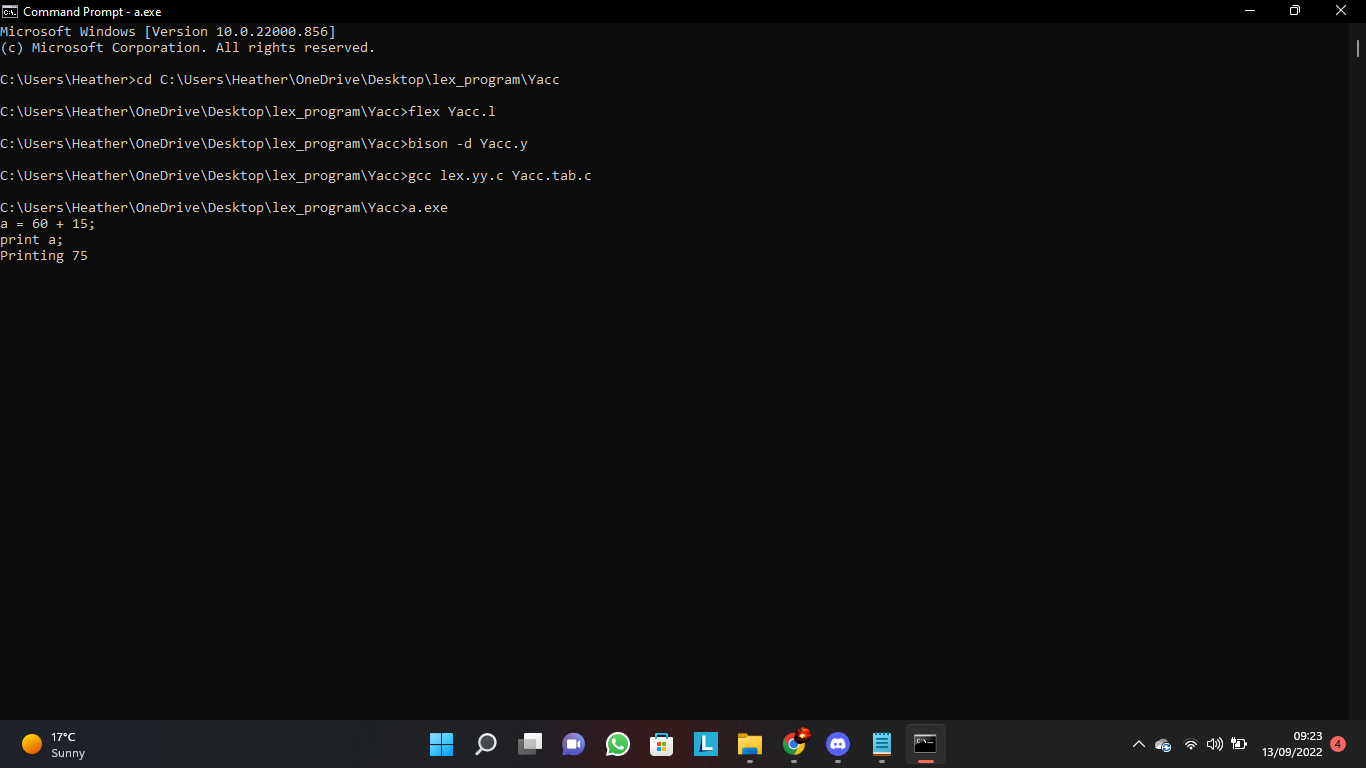

# **LAB 2**

Part 1 of Lab 2 has already been in done in the previous lab as seen in Bison and Flex.

NFA to DFA Conversion
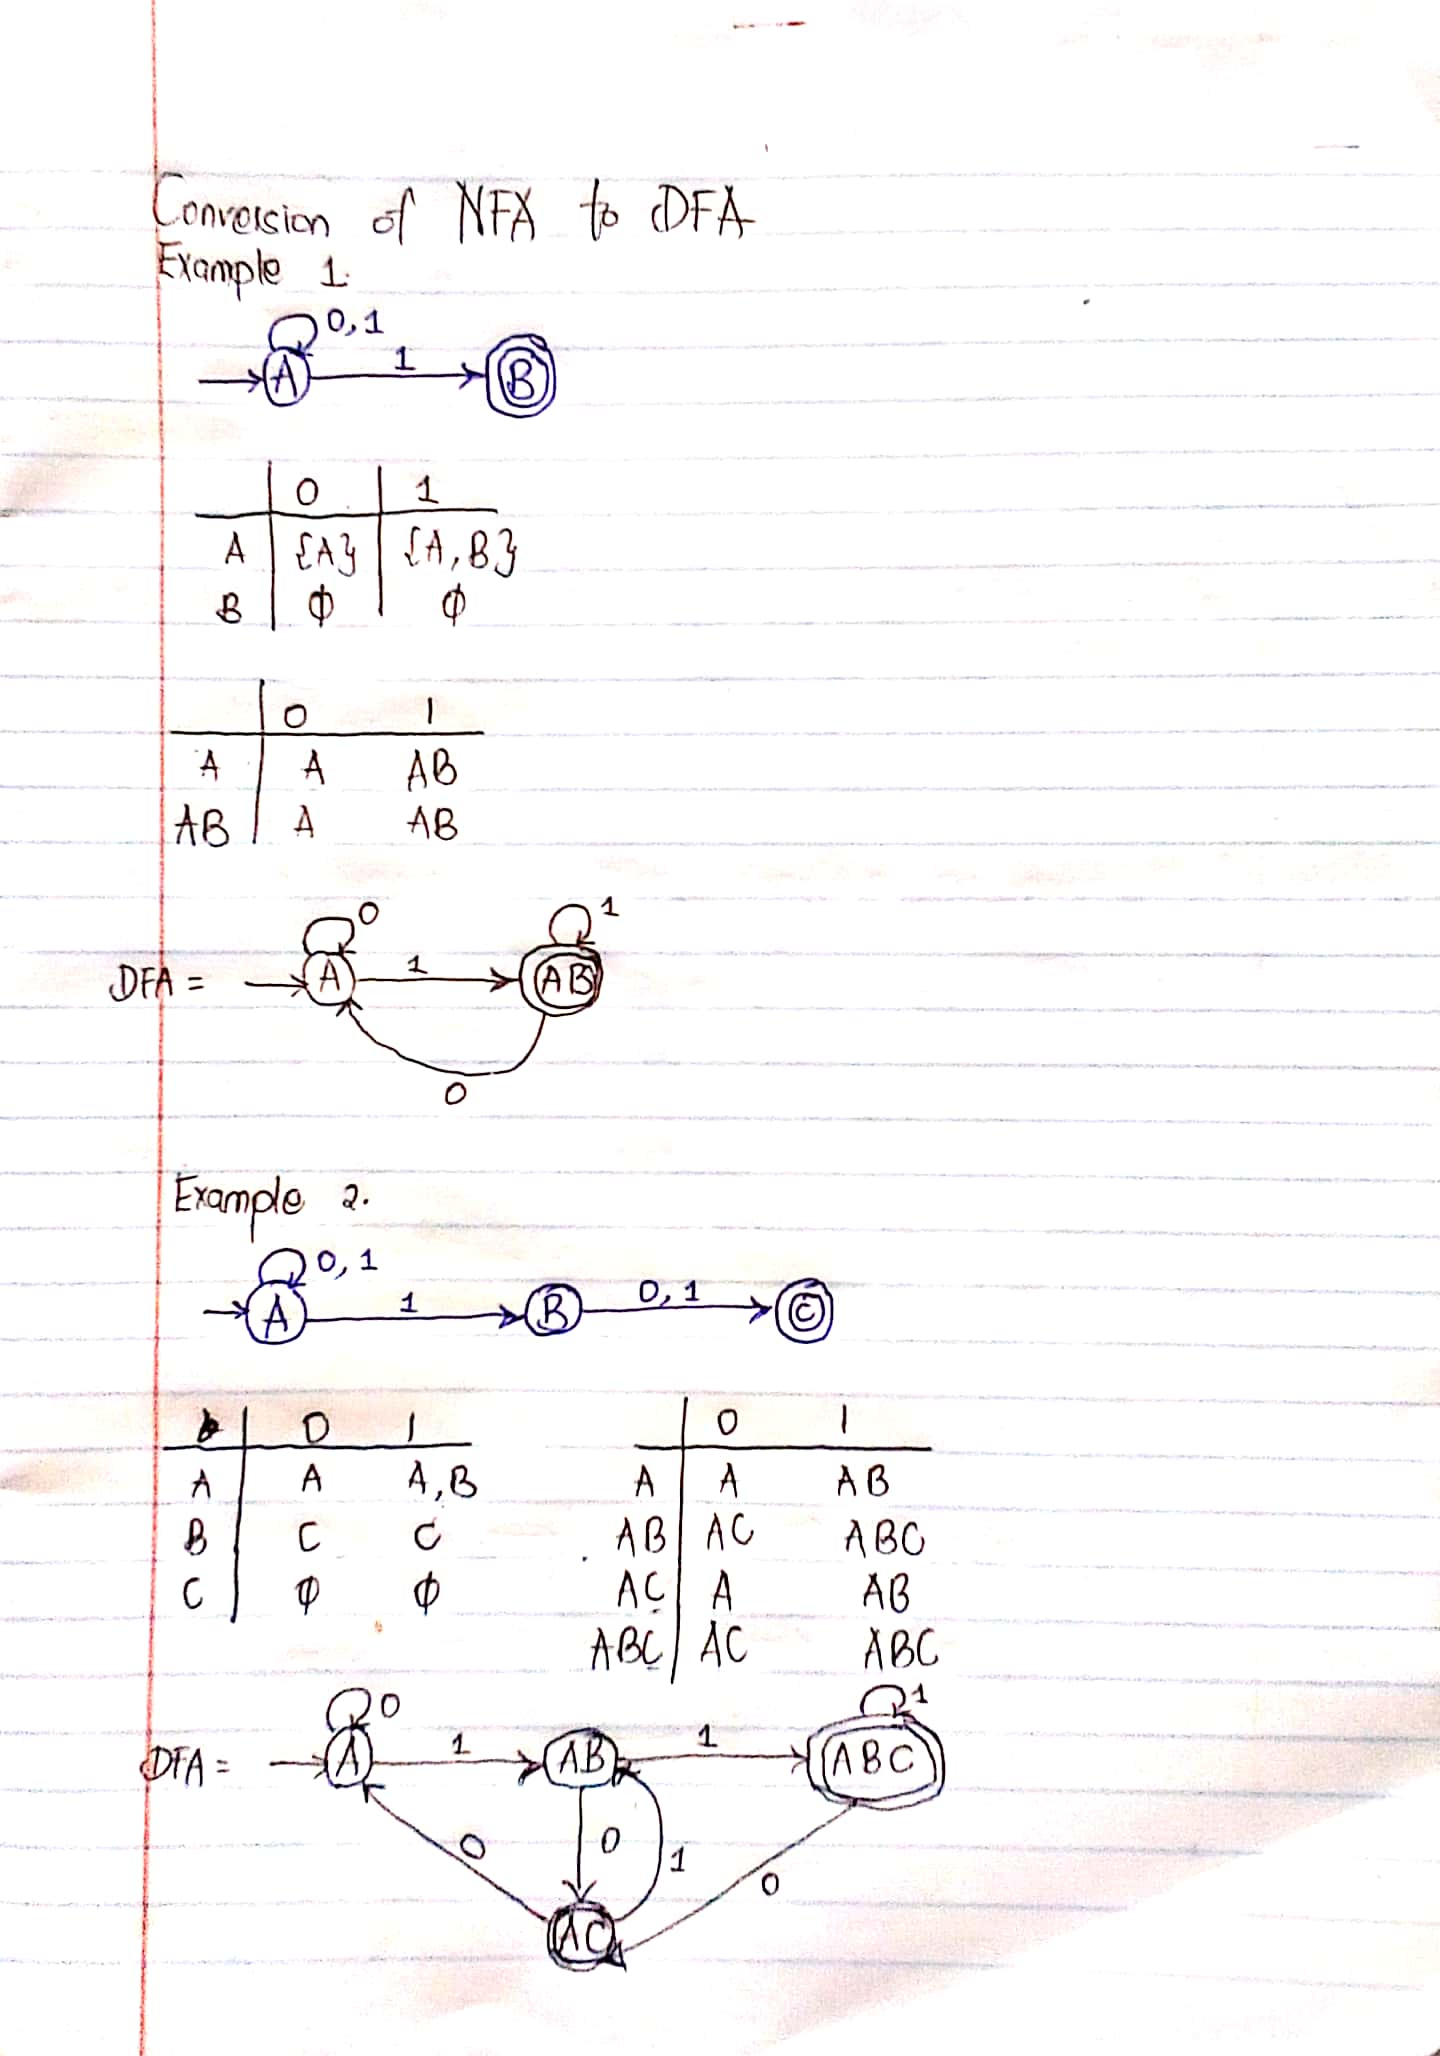